In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/81 (2).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/58 (11).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/94 (3).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/97 (30).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/93 (1).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/68 (12).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/91 (31).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/91 (35).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/80 (5).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/89 (1).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/88 (6).jpg
/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/93 (34).jp

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub 

In [3]:
normal_path = "/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Normal"
stroke_path = "/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke"

In [4]:
normal_folder = os.listdir(normal_path)
stroke_folder = os.listdir(stroke_path)

In [5]:
print("Images in Normal Data:",len(normal_folder))
print("Images in Stroke Data:",len(stroke_folder))

Images in Normal Data: 1551
Images in Stroke Data: 950


In [6]:
normal_path = "/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Normal"
stroke_path = "/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke"

data = []

for img_file in normal_folder:
    image = Image.open("/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Normal/" + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    
for img_file in stroke_folder:
    image = Image.open("/kaggle/input/brain-stroke-ct-image-dataset/Brain_Data_Organised/Stroke/" + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [7]:
len(data)

2501

In [8]:
data[0].shape

(224, 224, 3)

In [9]:
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [10]:
normal_label = [0]*len(normal_folder)
stroke_label = [1]*len(stroke_folder)

In [11]:
Target_label = normal_label + stroke_label

In [12]:
len(Target_label)

2501

In [13]:
x = np.array(data)
y = np.array(Target_label)

In [14]:
x[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [15]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2250, 224, 224, 3)
(251, 224, 224, 3)
(2250,)
(251,)


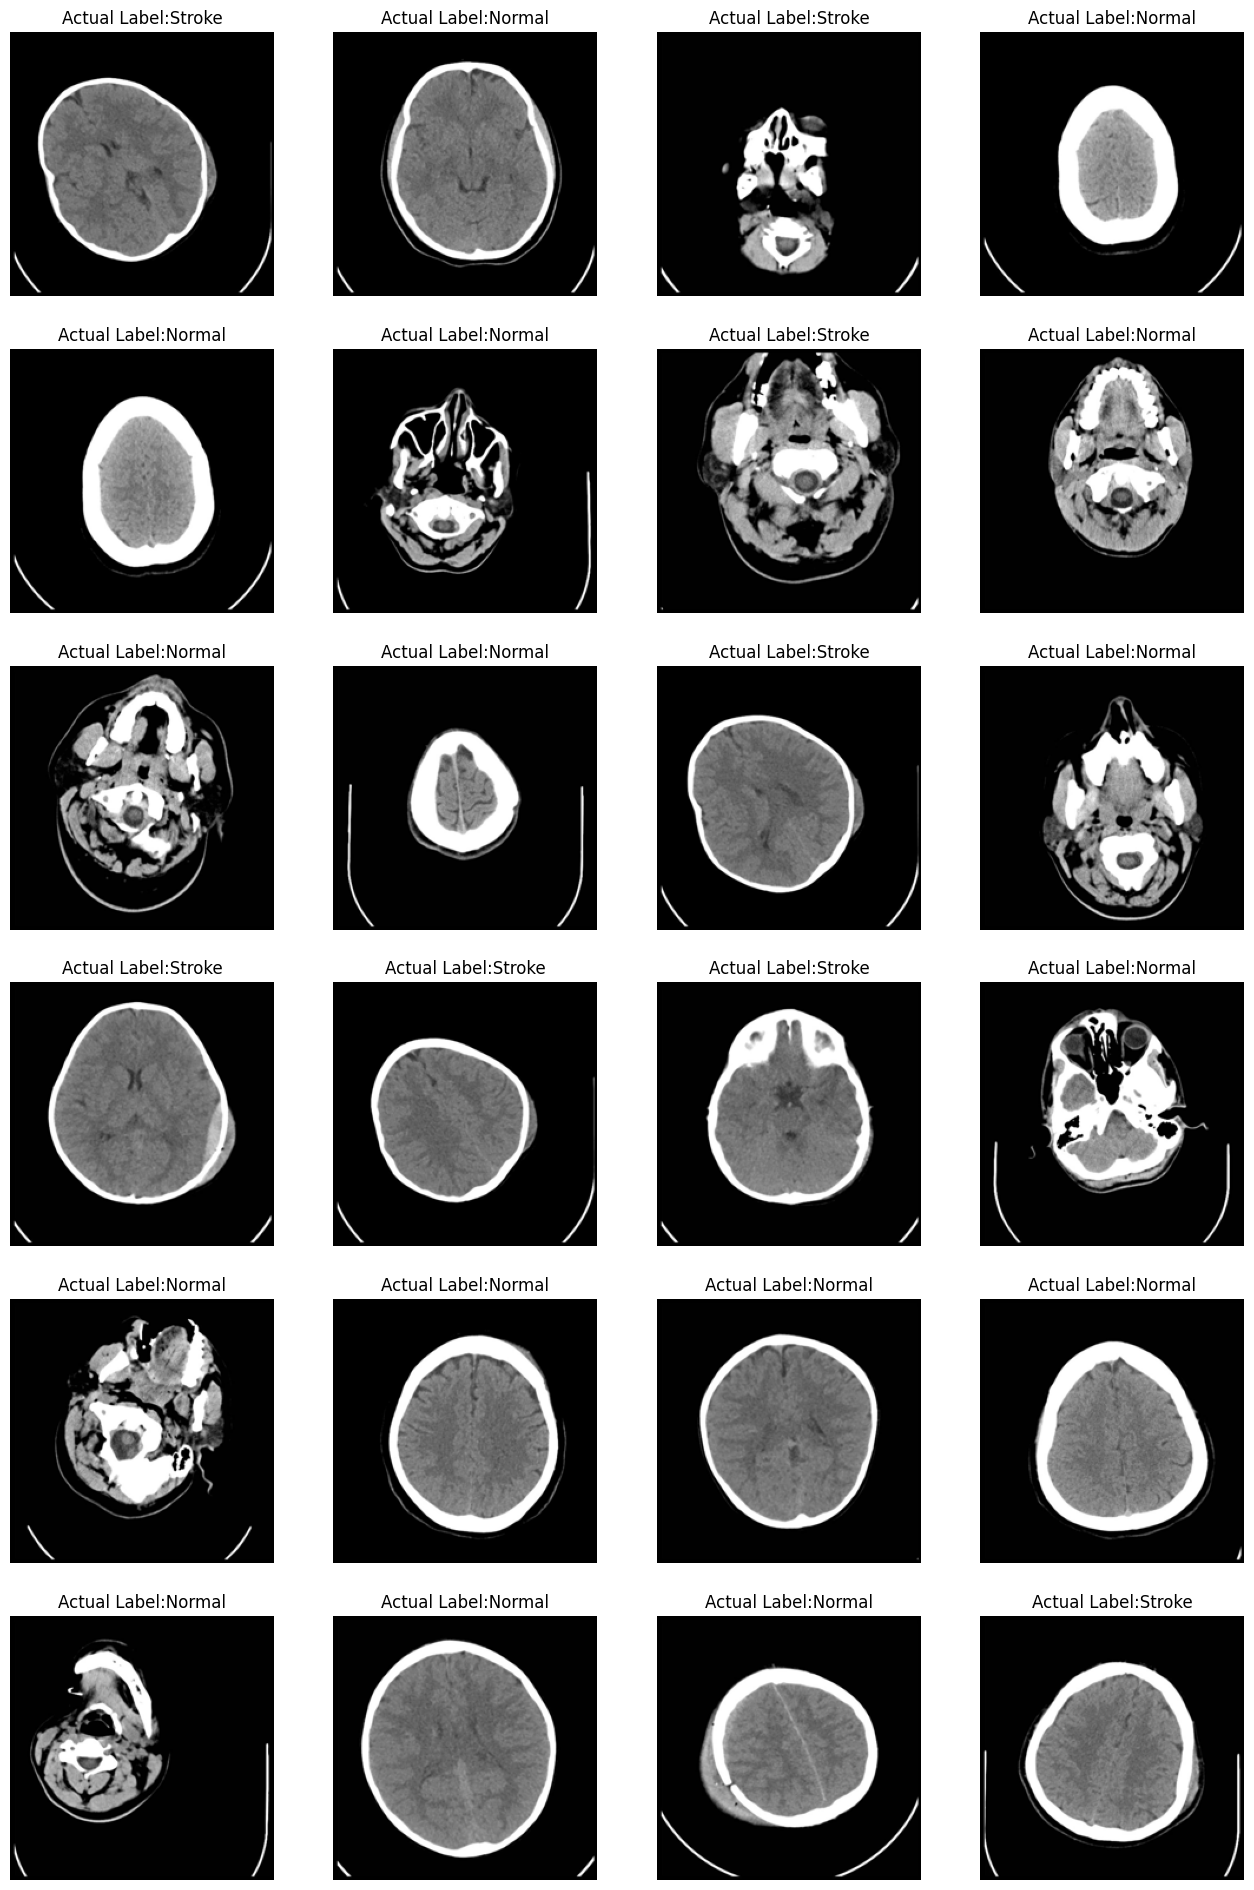

In [17]:
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,24))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Actual Label:{class_labels[y_train[i]]}")
    plt.axis("off")

In [18]:
model = Sequential()

model.add(Conv2D(filters=100,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=80,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",
             metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 100)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 80)      72080     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 80)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        46144     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [19]:
history = model.fit(x_train,y_train,batch_size=32,
         epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
71/71 [==============================] - 362s 5s/step - loss: 6.3493 - accuracy: 0.7076 - val_loss: 0.2353 - val_accuracy: 0.8884
Epoch 2/5
71/71 [==============================] - 375s 5s/step - loss: 0.1535 - accuracy: 0.9396 - val_loss: 0.1105 - val_accuracy: 0.9522
Epoch 3/5
71/71 [==============================] - 379s 5s/step - loss: 0.0621 - accuracy: 0.9778 - val_loss: 0.0910 - val_accuracy: 0.9681
Epoch 4/5
71/71 [==============================] - 371s 5s/step - loss: 0.0398 - accuracy: 0.9867 - val_loss: 0.1292 - val_accuracy: 0.9562
Epoch 5/5
71/71 [==============================] - 371s 5s/step - loss: 0.0197 - accuracy: 0.9947 - val_loss: 0.0986 - val_accuracy: 0.9841


In [20]:
loss, acc = model.evaluate(x_test,y_test)
print("Loss on Test Data:",loss)
print("Accuracy on Test Data:",acc)

loss, acc = model.evaluate(x_train,y_train)
print("Loss on Train Data:",loss)
print("Accuracy on Train Data:",acc)

8/8 [==============================] - 11s 1s/step - loss: 0.0986 - accuracy: 0.9841
Loss on Test Data: 0.09864937514066696
Accuracy on Test Data: 0.9840637445449829
71/71 [==============================] - 94s 1s/step - loss: 0.0026 - accuracy: 0.9996
Loss on Train Data: 0.0025929289404302835
Accuracy on Train Data: 0.9995555281639099


In [21]:
y_pred_test = model.predict(x_test)
y_pred_test_label = [1 if i>=0.5 else 0 for i in y_pred_test]

8/8 [==============================] - 10s 1s/step


In [22]:
print("Actual Label:",y_test[:10])
print("Predicted Label:",y_pred_test_label[:10])

Actual Label: [1 1 1 1 0 1 0 1 1 0]
Predicted Label: [1, 1, 1, 1, 0, 1, 0, 1, 1, 0]


In [23]:
print("-----Metrics Evaluation On Test Data -----")
print()
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_test_label))
print()
print("Classification Report:\n",classification_report(y_test,y_pred_test_label))

-----Metrics Evaluation On Test Data -----

Confusion Matrix:
 [[148   3]
 [  1  99]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       151
           1       0.97      0.99      0.98       100

    accuracy                           0.98       251
   macro avg       0.98      0.99      0.98       251
weighted avg       0.98      0.98      0.98       251



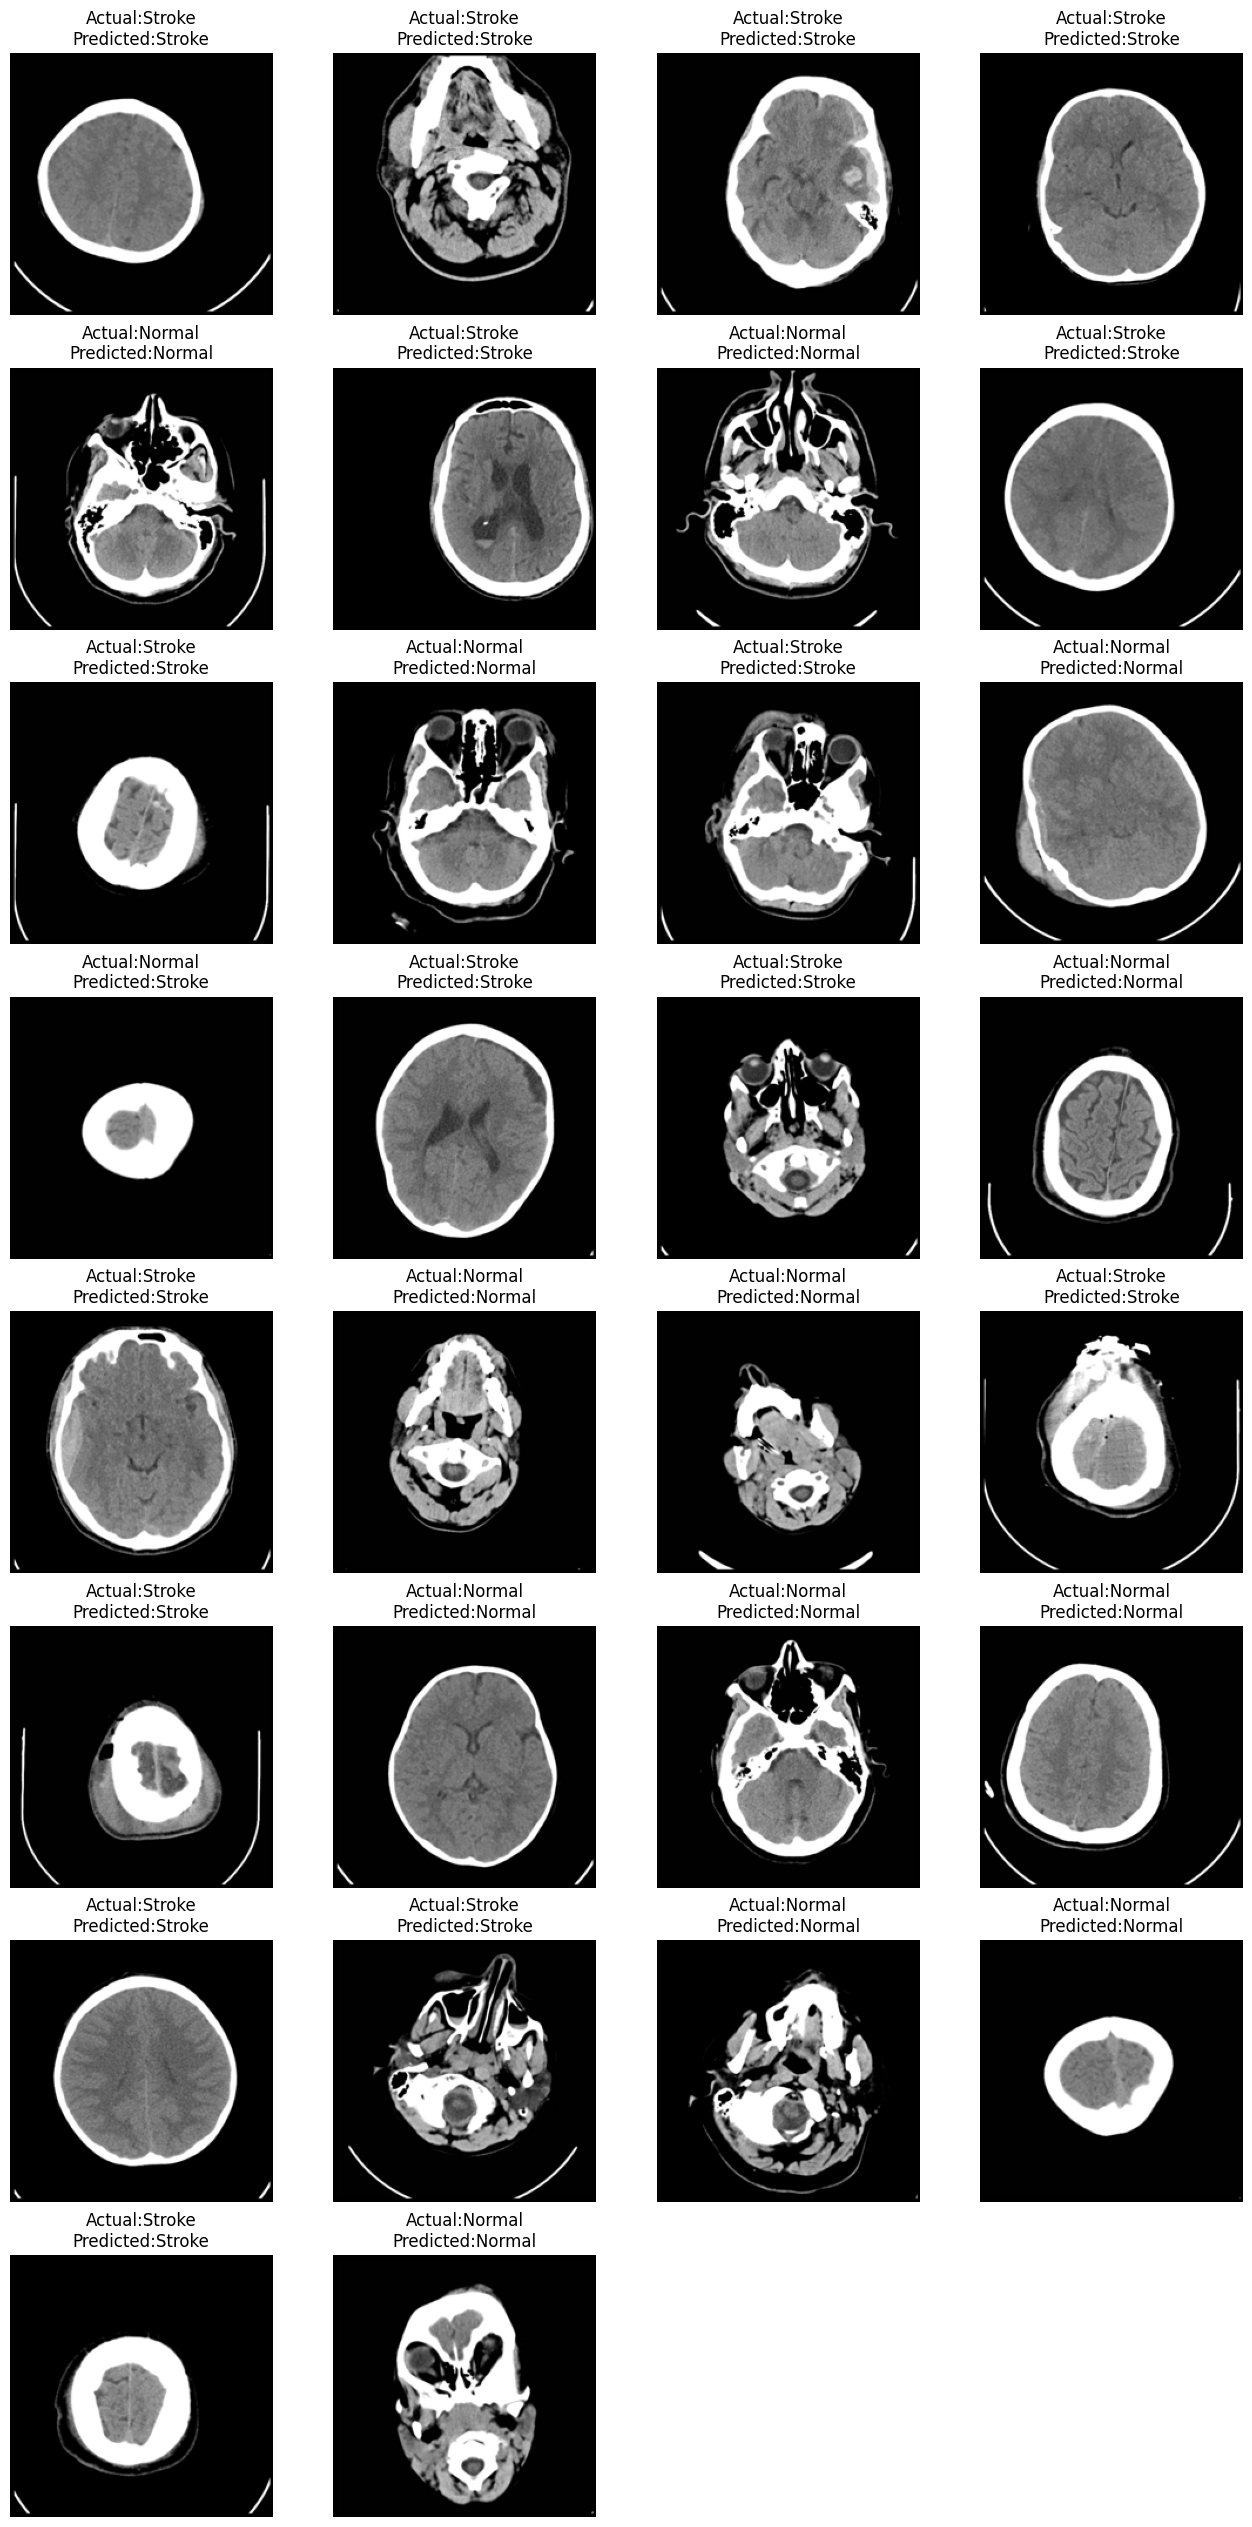

In [24]:
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,32))
for i in range(30):
    plt.subplot(8,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_labels[y_test[i]]}\nPredicted:{class_labels[y_pred_test_label[i]]}")
    plt.axis("off")